<a href="https://colab.research.google.com/github/Nisarg03/Data-Science-Projects/blob/main/Covid_19_Analytics_Country_wise_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,3) # make figures larger

In [2]:
base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/" # loading from Internet
# base_url = "../../data/COVID/" # loading from disk
infected_dataset_url = base_url + "time_series_covid19_confirmed_global.csv"
recovered_dataset_url = base_url + "time_series_covid19_recovered_global.csv"
deaths_dataset_url = base_url + "time_series_covid19_deaths_global.csv"
countries_dataset_url = base_url + "../UID_ISO_FIPS_LookUp_Table.csv"

In [4]:
infected = pd.read_csv(infected_dataset_url)
recovered = pd.read_csv(recovered_dataset_url)
deaths = pd.read_csv(deaths_dataset_url)
infected.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/6/22,5/7/22,5/8/22,5/9/22,5/10/22,5/11/22,5/12/22,5/13/22,5/14/22,5/15/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,178919,178922,178981,179010,179017,179131,179169,179203,179242,179267
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,275310,275341,275366,275372,275416,275440,275485,275534,275574,275615
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265791,265794,265798,265800,265804,265806,265808,265814,265816,265818
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,41717,41717,41717,41717,41717,41717,42156,42156,42156,42156
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99287,99287,99287,99287,99287,99287,99287,99287,99287,99287


In [5]:
infected = infected.groupby('Country/Region').sum()
recovered = recovered.groupby('Country/Region').sum()
deaths = deaths.groupby('Country/Region').sum()

infected.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/6/22,5/7/22,5/8/22,5/9/22,5/10/22,5/11/22,5/12/22,5/13/22,5/14/22,5/15/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,...,178919,178922,178981,179010,179017,179131,179169,179203,179242,179267
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,...,275310,275341,275366,275372,275416,275440,275485,275534,275574,275615
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,...,265791,265794,265798,265800,265804,265806,265808,265814,265816,265818
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,...,41717,41717,41717,41717,41717,41717,42156,42156,42156,42156
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,...,99287,99287,99287,99287,99287,99287,99287,99287,99287,99287


In [7]:
infected.drop(columns=['Lat','Long'],inplace=True)
recovered.drop(columns=['Lat','Long'],inplace=True)
deaths.drop(columns=['Lat','Long'],inplace=True)

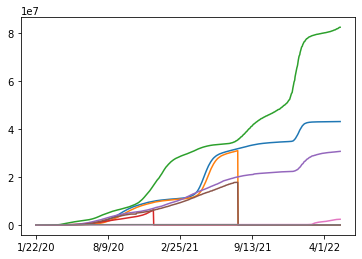

In [6]:
def infrecplot(countries):
    for country in countries:
        infected.loc[country][2:].plot()
        recovered.loc[country][2:].plot()
    plt.show()

countries = ['India','US', 'Brazil', 'China']
infrecplot(countries)

In [8]:
def mkframe(country):
    df = pd.DataFrame({ 'infected' : infected.loc[country] ,
                        'recovered' : recovered.loc[country],
                        'deaths' : deaths.loc[country]})
    df.index = pd.to_datetime(df.index)
    return df


In [9]:
df = []
for country in countries:
    df.append(mkframe(country))
df

[            infected  recovered  deaths
 2020-01-22         0          0       0
 2020-01-23         0          0       0
 2020-01-24         0          0       0
 2020-01-25         0          0       0
 2020-01-26         0          0       0
 ...              ...        ...     ...
 2022-05-11  43113413          0  524181
 2022-05-12  43116254          0  524190
 2022-05-13  43119112          0  524201
 2022-05-14  43121599          0  524214
 2022-05-15  43123801          0  524241
 
 [845 rows x 3 columns],             infected  recovered  deaths
 2020-01-22         1          0       0
 2020-01-23         1          0       0
 2020-01-24         2          0       0
 2020-01-25         2          0       0
 2020-01-26         5          0       0
 ...              ...        ...     ...
 2022-05-11  82223174          0  998997
 2022-05-12  82325687          0  999125
 2022-05-13  82421624          0  999518
 2022-05-14  82437716          0  999570
 2022-05-15  82468606          

<function matplotlib.pyplot.show>

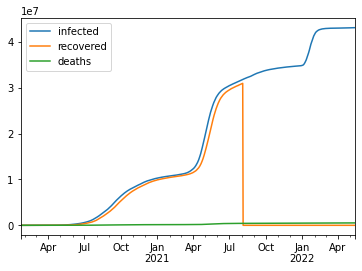

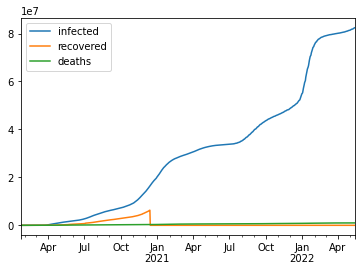

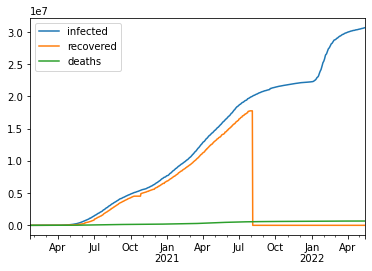

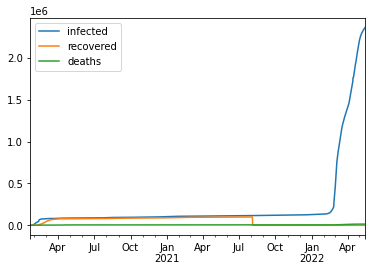

In [11]:
for d in df: d.plot()
plt.show

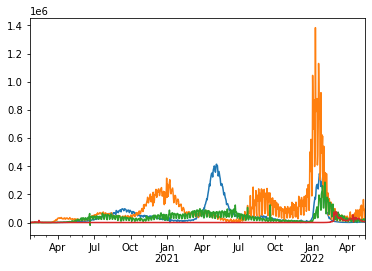

In [15]:
def ninfected(df):
    df['ninfected'] = df['infected'].diff()
    df['ninfected'].plot()

for d in df: ninfected(d)
plt.show()

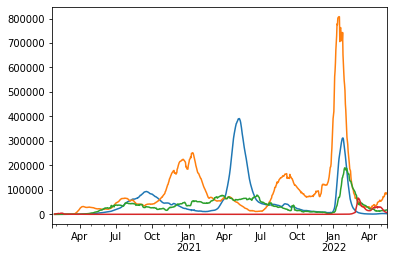

In [16]:
def addninf(df):
    df['ninfav'] = df['ninfected'].rolling(window=7).mean()
    df['ninfav'].plot()

for d in df: addninf(d)
plt.show()

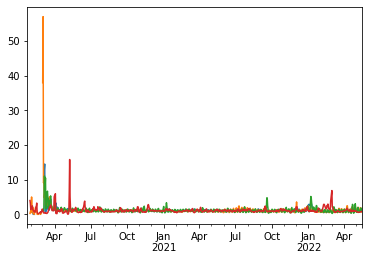

In [17]:
def rt(df):
    df['Rt'] = df['ninfected'].rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())
    df['Rt'].plot()

for d in df: rt(d)
plt.show()